In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math
import time
import os
import sys
current_path = os.getcwd()
path_to_files = current_path + '/../sz_auxiliary_files/'



TCMB = 2.726 #Kelvin
TCMB_uK = 2.726e6 #micro-Kelvin


hplanck=6.626068e-34 #MKS
kboltz=1.3806503e-23 #MKS
clight=299792458.0 #MKS
m_elec = 510.999 #keV

# tsz function
def fsz(nu_ghz):
    nu = 1.e9*np.asarray(nu_ghz).astype(float)
    X = hplanck*nu/(kboltz*TCMB)
    resp = (X / np.tanh(X/2.0) - 4.0) * TCMB_uK #put explicitly into uK_CMB units,
    return resp
sys.path.append('/Users/boris/Work/CLASS-SZ/SO-SZ/rancat/rancat')
import cosmology as co

import healpy as hp

In [2]:
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]


In [8]:
cib_map_353  =hp.read_map('/Users/boris/Work/CLASS-SZ/SO-SZ/websky_cib/cib_nu0353.fits')

In [25]:
alpms = hp.map2alm(cib_map_353)
cls_ws = hp.sphtfunc.alm2cl(alpms)


In [26]:
ls_ws = np.arange(0,len(cls_ws))
dls_ws = ls_ws*(ls_ws+1.)/2./np.pi*cls_ws

In [27]:
# np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/websky_cib/cl_cib_cib_353_websky_l_cl_090322.txt',
#            np.c_[ls_ws,cls_ws])

In [30]:
cib_map  =hp.read_map('/Users/boris/Work/CLASS-SZ/SO-SZ/websky_cib/cib_nu0857.fits')

/usr/local/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 4096
  warnings.warn("NSIDE = {0:d}".format(nside))
/usr/local/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/usr/local/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


In [31]:
alpms = hp.map2alm(cib_map)
cls_ws = hp.sphtfunc.alm2cl(alpms)


In [32]:
ls_ws = np.arange(0,len(cls_ws))
dls_ws = ls_ws*(ls_ws+1.)/2./np.pi*cls_ws

In [33]:
# np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/websky_cib/cl_cib_cib_857_websky_l_cl_090322.txt',
#            np.c_[ls_ws,cls_ws])

In [36]:
cib_map  =hp.read_map('/Users/boris/Work/CLASS-SZ/SO-SZ/websky_cib/cib_nu0278.fits')

/usr/local/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 4096
  warnings.warn("NSIDE = {0:d}".format(nside))
/usr/local/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/usr/local/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


In [37]:
alpms = hp.map2alm(cib_map)
cls_ws = hp.sphtfunc.alm2cl(alpms)


In [38]:
ls_ws = np.arange(0,len(cls_ws))
dls_ws = ls_ws*(ls_ws+1.)/2./np.pi*cls_ws

In [39]:
# np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/websky_cib/cl_cib_cib_278_websky_l_cl_090322.txt',
#            np.c_[ls_ws,cls_ws])

In [41]:
cib_map  =hp.read_map('/Users/boris/Work/CLASS-SZ/SO-SZ/websky_cib/cib_nu0100.fits')

/usr/local/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 4096
  warnings.warn("NSIDE = {0:d}".format(nside))
/usr/local/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/usr/local/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


In [42]:
alpms = hp.map2alm(cib_map)
cls_ws = hp.sphtfunc.alm2cl(alpms)


In [43]:
ls_ws = np.arange(0,len(cls_ws))
dls_ws = ls_ws*(ls_ws+1.)/2./np.pi*cls_ws

In [44]:
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/websky_cib/cl_cib_cib_100_websky_l_cl_090322.txt',
           np.c_[ls_ws,cls_ws])

In [46]:
cib_freq_list = ['545','217','225','145','143','093']
for cib_freq in cib_freq_list:
    cib_map  =hp.read_map('/Users/boris/Work/CLASS-SZ/SO-SZ/websky_cib/cib_nu0'+cib_freq+'.fits')
    alpms = hp.map2alm(cib_map)
    cls_ws = hp.sphtfunc.alm2cl(alpms)
    ls_ws = np.arange(0,len(cls_ws))
    dls_ws = ls_ws*(ls_ws+1.)/2./np.pi*cls_ws
    np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/websky_cib/cl_cib_cib_'+cib_freq+'_websky_l_cl_090322.txt',
           np.c_[ls_ws,cls_ws])


    

/usr/local/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 4096
  warnings.warn("NSIDE = {0:d}".format(nside))
/usr/local/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/usr/local/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


In [75]:
np.mean(cib_map)

0.0021490154765762396

In [76]:
np.sqrt(cls_ws[0]*1e12)

432287.0039592663

In [77]:
0.0021490154765762396/32287.0039592663

6.655976749305897e-08

In [90]:
2.*np.pi

6.283185307179586

websky_monopole_353_in_Jy: 432287.0039592663
websky_monopole_857_in_Jy: 2108710.1677935855
websky_monopole_278_in_Jy: 229992.07100518135
websky_monopole_100_in_Jy: 9703.602470984737


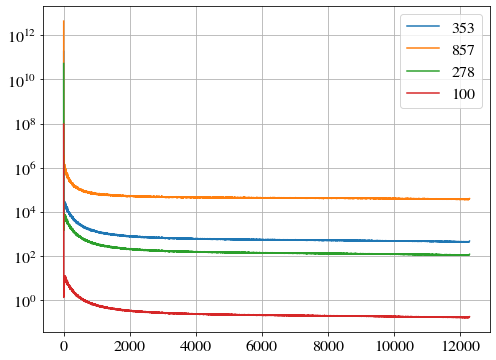

In [45]:
ls_ws,cls_ws = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/websky_cib/cl_cib_cib_353_websky_l_cl_090322.txt',unpack=True)
plt.plot(ls_ws,cls_ws*1e12,label='353')


ls_ws,cls_ws = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/websky_cib/cl_cib_cib_857_websky_l_cl_090322.txt',unpack=True)
plt.plot(ls_ws,cls_ws*1e12,label='857')



ls_ws,cls_ws = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/websky_cib/cl_cib_cib_278_websky_l_cl_090322.txt',unpack=True)
plt.plot(ls_ws,cls_ws*1e12,label='278')



ls_ws,cls_ws = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/websky_cib/cl_cib_cib_100_websky_l_cl_090322.txt',unpack=True)
plt.plot(ls_ws,cls_ws*1e12,label='100')




plt.xscale('linear')
plt.yscale('log')
# plt.ylim(1e-3,2.)
# plt.xlim(8.,2.e4)
plt.grid(which='both')
plt.legend()

432287.0039592663

In [100]:
common_settings = {
                   'mass function' : 'T08', 
                   'delta for cib' : '200m',
                   'hm_consistency': 0,
}

# copied from : https://github.com/simonsobs/websky_model/blob/a93bbf758432a936c0ec2b59775683b695d3d191/websky_model/websky.py#L55
websky_Omega_M = 0.31
websky_Omega_B = 0.049
websky_Omega_L = 0.69
websky_h = 0.68
websky_sigma_8 = 0.81
websky_n_s = 0.965


websky_cosmo = {
    'omega_b': websky_Omega_B*websky_h**2.,
    'omega_cdm': (websky_Omega_M-websky_Omega_B)*websky_h**2.,
    'h': websky_h,
    'tau_reio': 0.0543,
    'sigma8': websky_sigma_8,
    'n_s': websky_n_s, 
    'use_websky_m200m_to_m200c_conversion': 1
}


# parameters used by Fiona and Mat
cib_params = {
       'hm_consistency': 0,
       'Redshift evolution of dust temperature' :  0.36,
       'Dust temperature today in Kelvins' : 24.4,
       'Emissivity index of sed' : 1.75,
       'Power law index of SED at high frequency' : 1.7,
       'Redshift evolution of L − M normalisation' : 3.6,
       'Most efficient halo mass in Msun' : 10.**12.6,
       'Normalisation of L − M relation in [Jy MPc2/Msun]' : 6.4e-8,
       'Size of of halo masses sourcing CIB emission' : 0.5,

        # M_min_HOD is the threshold above which nc = 1:
        'M_min_HOD' : 10.**10,

        'M_min' : 1e10*websky_cosmo['h'],
        'M_max' : 1e16*websky_cosmo['h'],
        'z_min' : 0.07,
        'z_max' : 6,
        'ell_min': 10.,
        'ell_max':5e4,
        'dlogell':0.2,
    
       'cib_frequency_list_num' : 1,
       'cib_frequency_list_in_GHz' : '353',   
    
}


# ~ model 2 of https://arxiv.org/pdf/1208.5049.pdf (Table 5)
# more exactly:
# shang_zplat  = 2.0
# shang_Td     = 20.7
# shang_beta   = 1.6
# shang_eta    = 1.28
# shang_alpha  = 0.2
# shang_Mpeak  = 10.**12.3
# shang_sigmaM = 0.3

# centrals is Ncen = 1 for all halos with mass bigger than websky's m_min
# subhalo mass function is eq. 3.9 of the websky paper 
# it is F. Jiang and F. C. van den Bosch, Generating merger trees for dark matter haloes: a comparison of
# methods, MNRAS 440 (2014) 193 [1311.5225].
websky_cib_params = {
       
       'Redshift evolution of dust temperature' :  0.2,
       'Dust temperature today in Kelvins' : 20.7,
       'Emissivity index of sed' : 1.6,
       'Power law index of SED at high frequency' : 1.7, # not given in WebSky paper, actually not relevant since we dont use high freqs in websky.
       'Redshift evolution of L − M normalisation' : 1.28,
       'Most efficient halo mass in Msun' : 10.**12.3,
       'Normalisation of L − M relation in [Jy MPc2/Msun]' : 1e-7,  # not given in WebSky paper
       'Size of of halo masses sourcing CIB emission' : 0.3,
       'z_plateau_cib' : 2.,

        # M_min_HOD is the threshold above which nc = 1:
        # 'M_min_HOD' : 10.**10.1, # not used here
        'use_nc_1_for_all_halos_cib_HOD': 1,
    
        'sub_halo_mass_function' : 'JvdB14',
        'M_min_subhalo_in_Msun' : 1e11,
        'use_redshift_dependent_M_min': 1,
        'full_path_to_redshift_dependent_M_min':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/websky_halo_mass_completion_z_Mmin_in_Msun_over_h.txt',
        #'M_min' : 1e10*websky_cosmo['h'], # not used
        'M_max' : 1e16*websky_cosmo['h'],
        'z_min' : 5e-3,
        'z_max' : 4.6,
        'ell_min': 10.,
        'ell_max':5e4,
        'dlogell':0.2,
    
       'cib_frequency_list_num' : 1,
       'cib_frequency_list_in_GHz' : '353',  
    
        #for the monopole computation:
        'freq_min': 2e1,
        'freq_max': 4e3,
        'dlogfreq' : 0.05,

# table 1 of https://arxiv.org/pdf/1309.0382.pdf
#1: freq GHz 2: Flux cut mJy
# 100 - 400
# 143 - 350
# 217 - 225
# 353 - 315
# 545 - 350
# 857 - 710
# 3000  - 1000
#cib_Snu_1 = 315.
#cib_Snu_2 = 315.
        #'cib_Snu_cutoff_list [mJy]':'315',
        'has_cib_flux_cut': 0
}







M = Class()
M.set({'output':'cib_monopole,cib_cib_1h,cib_cib_2h'})
M.set(common_settings)
M.set(websky_cosmo)
# M.set(cib_params)
M.set(websky_cib_params)
M.compute()
cl_cib_cib = M.cl_cib_cib()

CIB Monopole

In [87]:
cib_freq_list = ['857','278','100','353','545','217','225','145','143','093']
nu_ws = []
I0_ws = []
for cib_freq in cib_freq_list:
    nu_ws.append(float(cib_freq))
#     ls_ws,cls_ws = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/websky_cib/cl_cib_cib_'+cib_freq+'_websky_l_cl_090322.txt',unpack=True)
#     r = np.sqrt(cls_ws[0]*1e12)
    cib_map  =hp.read_map('/Users/boris/Work/CLASS-SZ/SO-SZ/websky_cib/cib_nu0'+cib_freq+'.fits')
    r = np.mean(cib_map)*1e6
    I0_ws.append(r)
    
    

/usr/local/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 4096
  warnings.warn("NSIDE = {0:d}".format(nside))
/usr/local/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/usr/local/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


[]

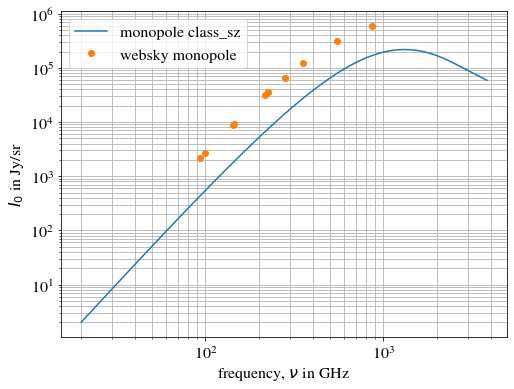

In [101]:
plt.plot(M.cib_monopole()['nu'],M.cib_monopole()['I0'],label=r'monopole class_sz')
plt.plot(nu_ws,I0_ws,marker='o',label='websky monopole',ls='None')
plt.xlabel(r'frequency, $\nu$ in GHz')
plt.ylabel(r'$I_0$ in Jy/sr')
plt.grid(which='both')
plt.legend()
plt.loglog()

In [102]:
print(nu_ws[3])
websky_monopole_353_in_Jy = I0_ws[3]


353.0


In [103]:
import scipy 
I0_ini_interp = scipy.interpolate.interp1d(M.cib_monopole()['nu'],M.cib_monopole()['I0'])
L0_websky = websky_monopole_353_in_Jy/I0_ini_interp(353)*1e-7
L0_websky

4.4605170242542964e-07

In [113]:
L0_websky = 4.4605170242542964e-07
M = Class()
M.set({'output':'cib_monopole,cib_cib_1h,cib_cib_2h'})
M.set(common_settings)
M.set(websky_cosmo)
M.set(websky_cib_params)

M.set({'Normalisation of L − M relation in [Jy MPc2/Msun]' :L0_websky,
#        'cib_Snu_cutoff_list [mJy]':'315',
#        'has_cib_flux_cut': 1   
       
       'cib_frequency_list_num' : 3,
       'cib_frequency_list_in_GHz' : '353,143,217',  
      })
M.compute()
cl_cib_cib = M.cl_cib_cib()

[]

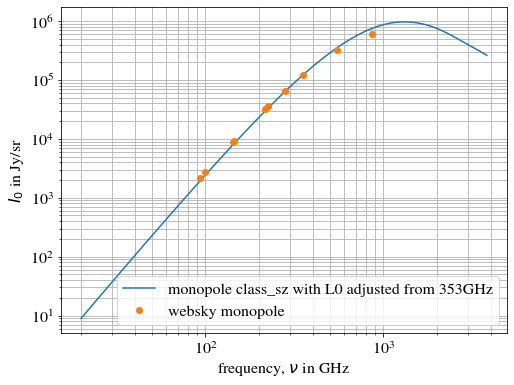

In [114]:
plt.plot(M.cib_monopole()['nu'],M.cib_monopole()['I0'],label=r'monopole class_sz with L0 adjusted from 353GHz')
plt.plot(nu_ws,I0_ws,marker='o',label='websky monopole',ls='None')
plt.xlabel(r'frequency, $\nu$ in GHz')
plt.ylabel(r'$I_0$ in Jy/sr')
plt.grid(which='both')
plt.legend()
plt.loglog()

CIB Power spectra

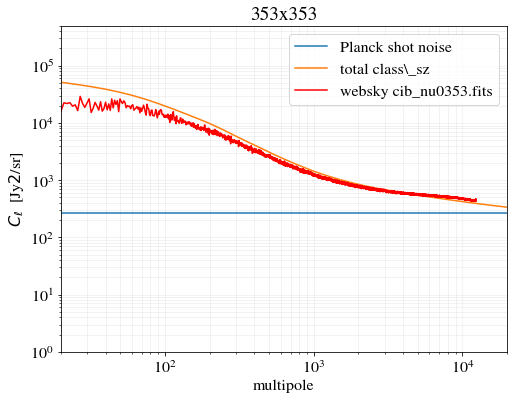

In [115]:
l_csz = np.asarray(cl_cib_cib['353x353']['ell'])
cls_to_dls = l_csz*(l_csz+1.)/2./np.pi
cls_csz_1h = np.asarray(cl_cib_cib['353x353']['1h'])/cls_to_dls
cls_csz_2h = np.asarray(cl_cib_cib['353x353']['2h'])/cls_to_dls

# plt.plot(l_csz,cls_csz_1h,c='k',label='class_sz 1h',ls='-.')
# plt.plot(l_csz,cls_csz_2h,c='k',label='class_sz 2h')

planck_shot_noise = 262*l_csz/l_csz
plt.plot(l_csz,planck_shot_noise,label='Planck shot noise')


plt.plot(l_csz,(cls_csz_1h+cls_csz_2h)+planck_shot_noise,label='total class\_sz')

ls_ws,cls_ws = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/websky_cib/cl_cib_cib_353_websky_l_cl_090322.txt',unpack=True)
plt.plot(ls_ws,cls_ws*1e12,c='r',label='websky cib_nu0353.fits')


# l_fm,cls_fm_1h = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/cib_files/cib_1h_353x353.txt',unpack=True)
# l_fm,cls_fm_2h = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/cib_files/cib_2h_353x353.txt',unpack=True)

# cls_fm_1h *= 1./(l_fm*(l_fm+1.)/2./np.pi) 
# cls_fm_2h *= 1./(l_fm*(l_fm+1.)/2./np.pi) 
# plt.plot(l_fm,cls_fm_1h,lw=0.5,c='grey',ls='-.',label='Fiona+Mat 1h')
# plt.plot(l_fm,cls_fm_2h,lw=0.5,c='grey',label='Fiona+Mat 2h')



plt.loglog()
plt.xlim(20,2e4)
plt.ylim(1,5e5)
plt.xlabel('multipole')
plt.ylabel(r'$C_\ell$  [Jy$2$/sr]')
plt.title('353x353')
plt.grid(which='both',alpha=0.2)
plt.legend()


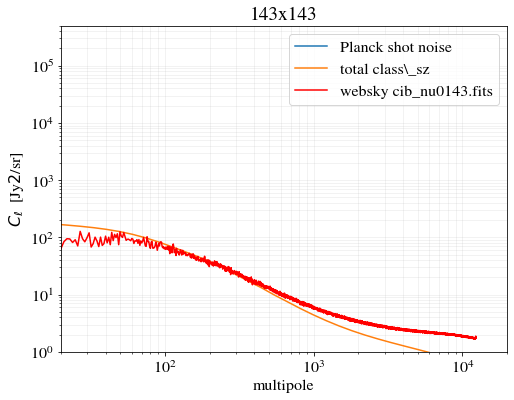

In [119]:
l_csz = np.asarray(cl_cib_cib['143x143']['ell'])
cls_to_dls = l_csz*(l_csz+1.)/2./np.pi
cls_csz_1h = np.asarray(cl_cib_cib['143x143']['1h'])/cls_to_dls
cls_csz_2h = np.asarray(cl_cib_cib['143x143']['2h'])/cls_to_dls

# plt.plot(l_csz,cls_csz_1h,c='k',label='class_sz 1h',ls='-.')
# plt.plot(l_csz,cls_csz_2h,c='k',label='class_sz 2h')

planck_shot_noise = 0.*l_csz/l_csz
plt.plot(l_csz,planck_shot_noise,label='Planck shot noise')


plt.plot(l_csz,(cls_csz_1h+cls_csz_2h)+planck_shot_noise,label='total class\_sz')

ls_ws,cls_ws = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/websky_cib/cl_cib_cib_143_websky_l_cl_090322.txt',unpack=True)
plt.plot(ls_ws,cls_ws*1e12,c='r',label='websky cib_nu0143.fits')


# l_fm,cls_fm_1h = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/cib_files/cib_1h_353x353.txt',unpack=True)
# l_fm,cls_fm_2h = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/cib_files/cib_2h_353x353.txt',unpack=True)

# cls_fm_1h *= 1./(l_fm*(l_fm+1.)/2./np.pi) 
# cls_fm_2h *= 1./(l_fm*(l_fm+1.)/2./np.pi) 
# plt.plot(l_fm,cls_fm_1h,lw=0.5,c='grey',ls='-.',label='Fiona+Mat 1h')
# plt.plot(l_fm,cls_fm_2h,lw=0.5,c='grey',label='Fiona+Mat 2h')



plt.loglog()
plt.xlim(20,2e4)
plt.ylim(1,5e5)
plt.xlabel('multipole')
plt.ylabel(r'$C_\ell$  [Jy$2$/sr]')
plt.title('143x143')
plt.grid(which='both',alpha=0.2)
plt.legend()


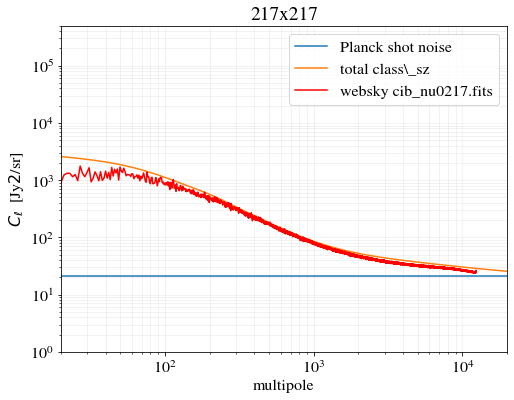

In [118]:
l_csz = np.asarray(cl_cib_cib['217x217']['ell'])
cls_to_dls = l_csz*(l_csz+1.)/2./np.pi
cls_csz_1h = np.asarray(cl_cib_cib['217x217']['1h'])/cls_to_dls
cls_csz_2h = np.asarray(cl_cib_cib['217x217']['2h'])/cls_to_dls

# plt.plot(l_csz,cls_csz_1h,c='k',label='class_sz 1h',ls='-.')
# plt.plot(l_csz,cls_csz_2h,c='k',label='class_sz 2h')

planck_shot_noise = 21.*l_csz/l_csz
plt.plot(l_csz,planck_shot_noise,label='Planck shot noise')


plt.plot(l_csz,(cls_csz_1h+cls_csz_2h)+planck_shot_noise,label='total class\_sz')

ls_ws,cls_ws = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/websky_cib/cl_cib_cib_217_websky_l_cl_090322.txt',unpack=True)
plt.plot(ls_ws,cls_ws*1e12,c='r',label='websky cib_nu0217.fits')


# l_fm,cls_fm_1h = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/cib_files/cib_1h_353x353.txt',unpack=True)
# l_fm,cls_fm_2h = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/cib_files/cib_2h_353x353.txt',unpack=True)

# cls_fm_1h *= 1./(l_fm*(l_fm+1.)/2./np.pi) 
# cls_fm_2h *= 1./(l_fm*(l_fm+1.)/2./np.pi) 
# plt.plot(l_fm,cls_fm_1h,lw=0.5,c='grey',ls='-.',label='Fiona+Mat 1h')
# plt.plot(l_fm,cls_fm_2h,lw=0.5,c='grey',label='Fiona+Mat 2h')



plt.loglog()
plt.xlim(20,2e4)
plt.ylim(1,5e5)
plt.xlabel('multipole')
plt.ylabel(r'$C_\ell$  [Jy$2$/sr]')
plt.title('217x217')
plt.grid(which='both',alpha=0.2)
plt.legend()


(Note that here the class_sz settings are not setup to reproduce Fiona+Mat's results, see at the end of the notebook for the benchmark comparison)

Here below is Fiona+Mat's plot from https://arxiv.org/pdf/2010.16405.pdf

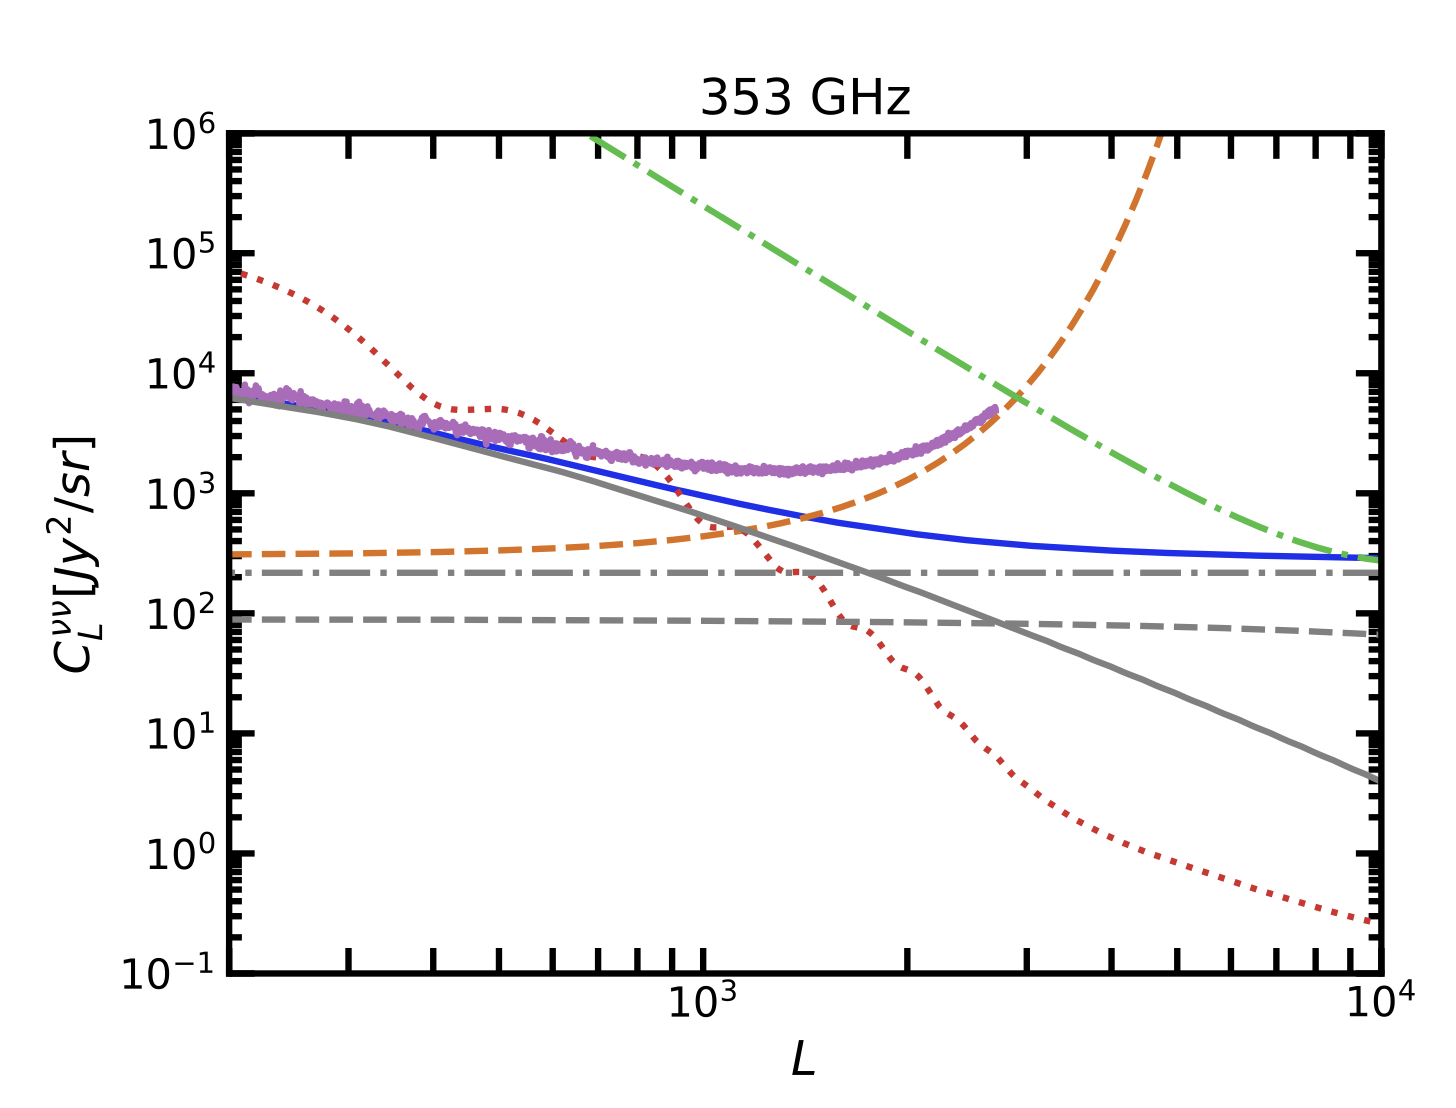

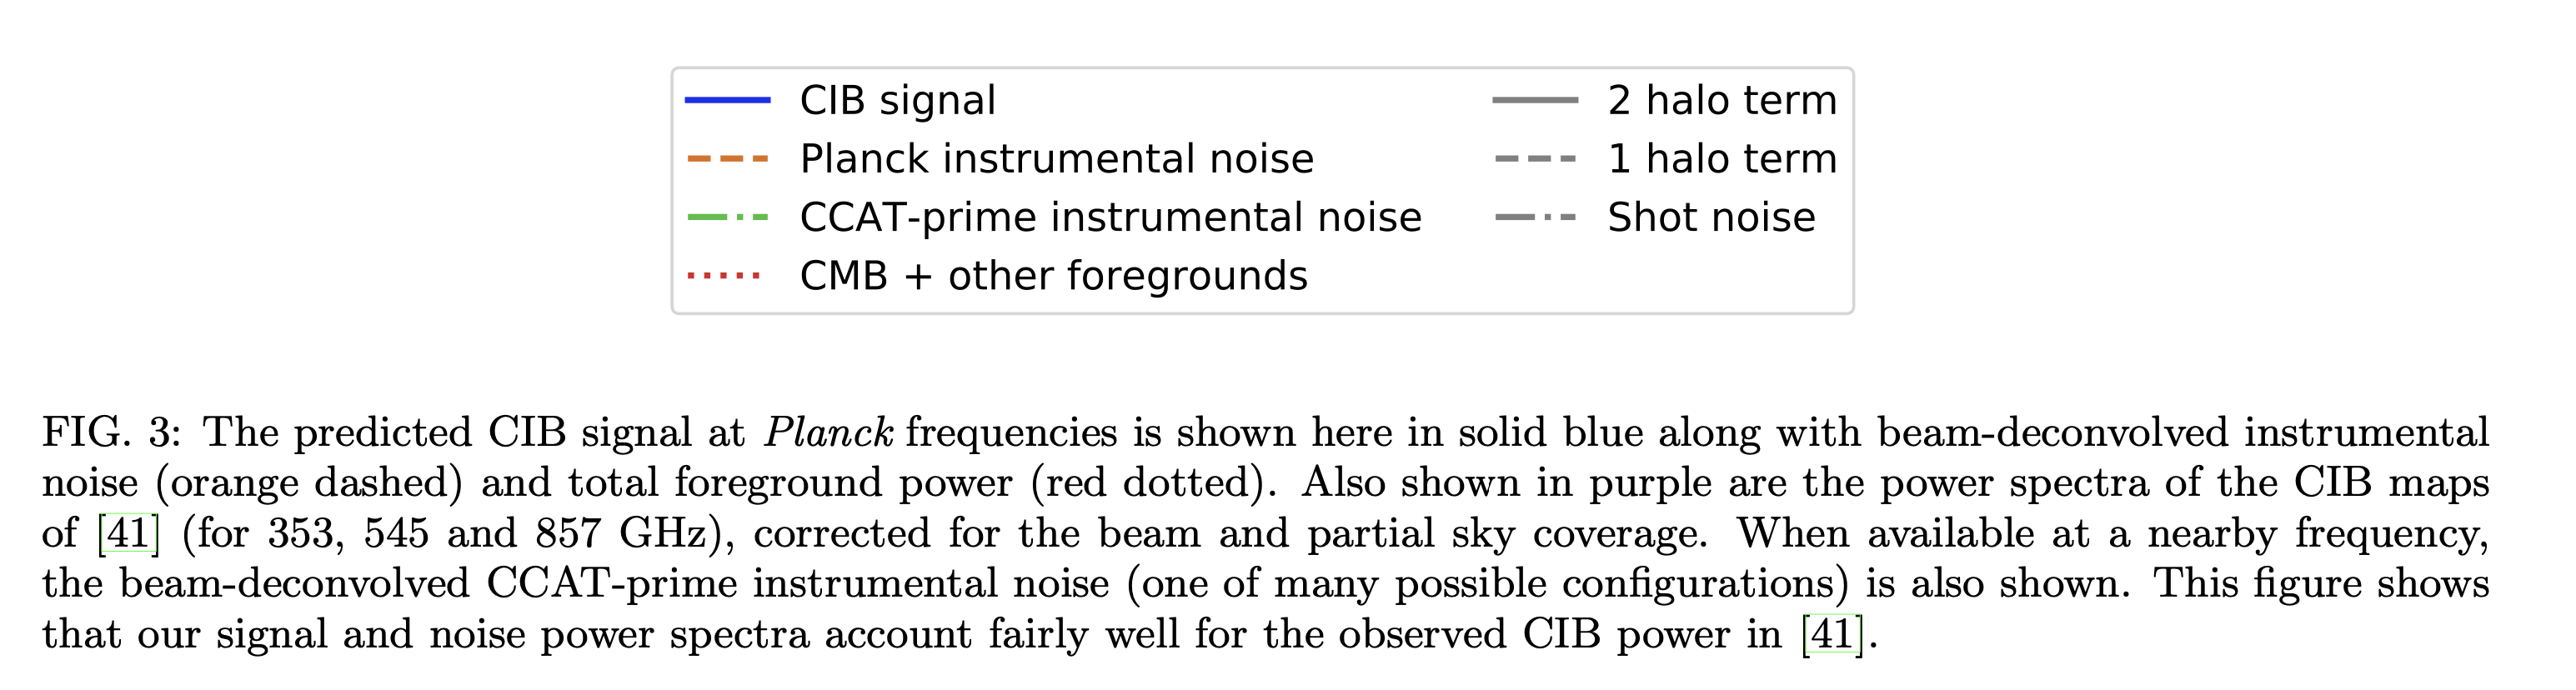

Ref 41 is D. Lenz, O. Dor ́e, and G. Lagache, ApJ 883, 75 (2019), 1905.00426.
https://arxiv.org/pdf/1905.00426.pdf

The CIB power spectrum plot from the websky paper https://arxiv.org/pdf/2001.08787.pdf

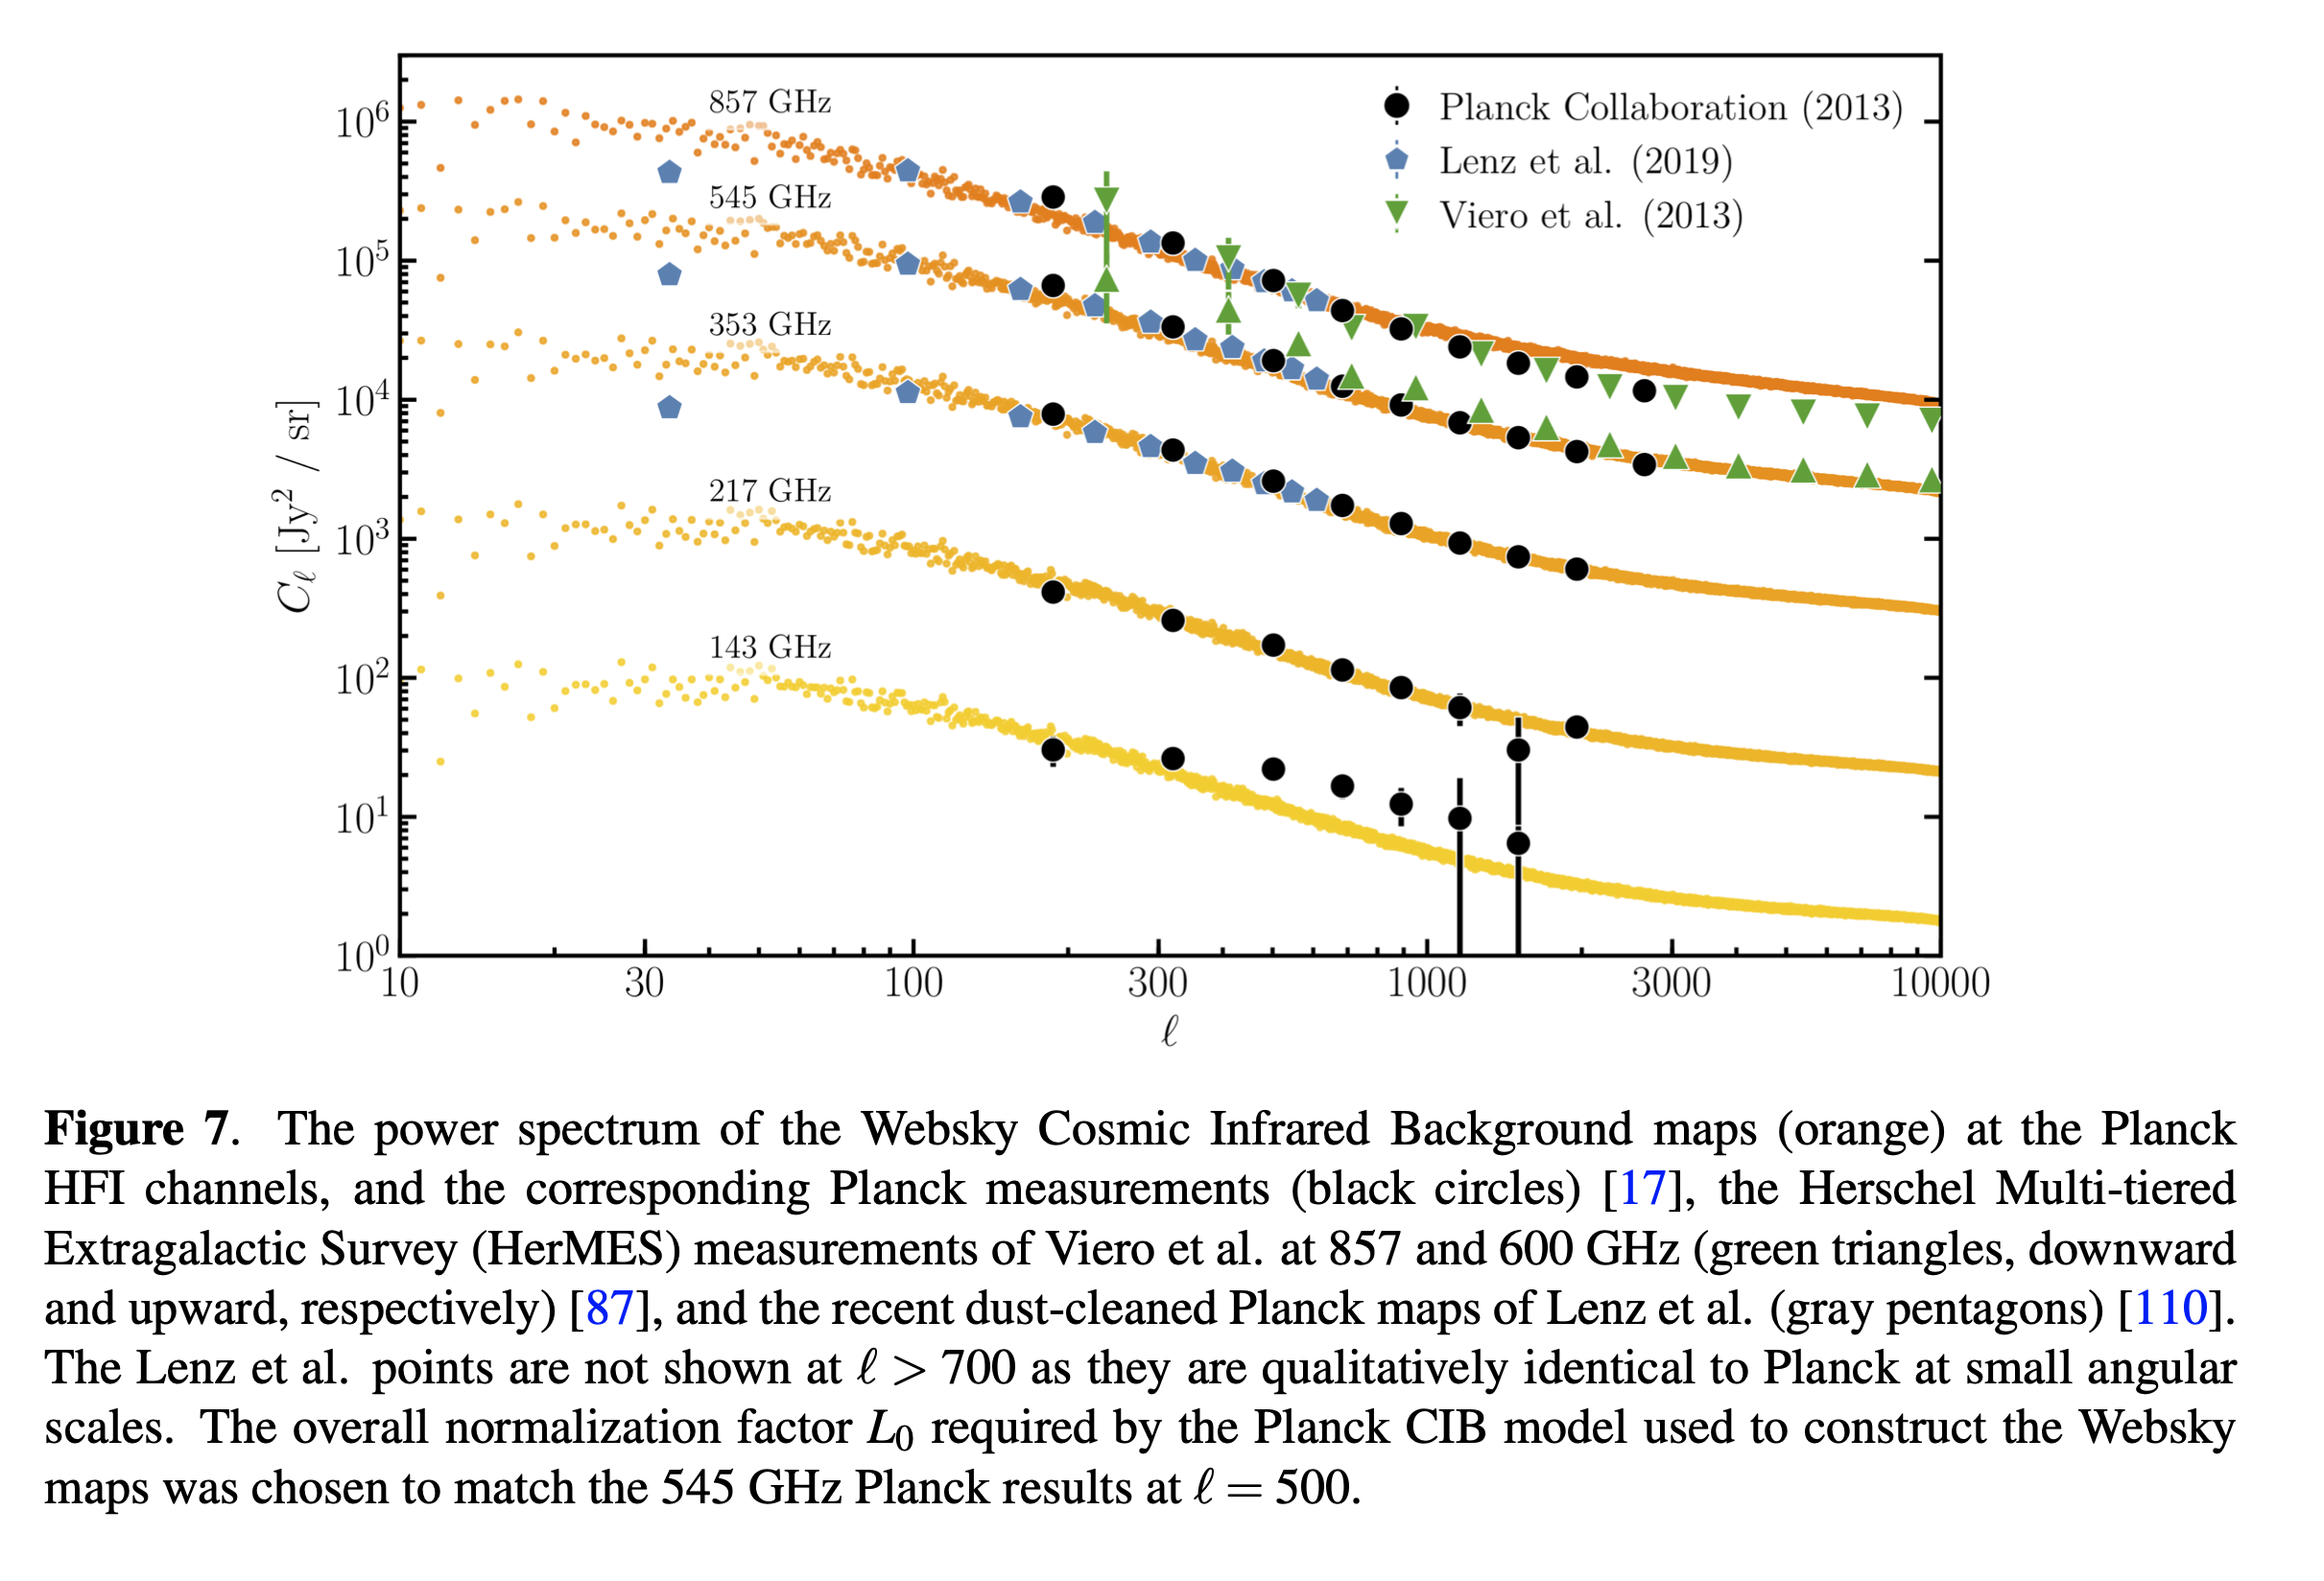

The Planck measurments here are different they are from Planck Collaboration, P. A. R. Ade, N. Aghanim, C. Armitage-Caplan, M. Arnaud, M. Ashdown et al.,
Planck 2013 results. XXX. Cosmic infrared background measurements and implications for star formation, A&A 571 (2014) A30 [1309.0382].
https://arxiv.org/pdf/1309.0382.pdf


CCL-class_sz-Fiona/Mat benchmark computation by running: <br>
$ python compute_and_plot_cib_simple.py -param_name 'h' -p_val '[0.6711]' -output 'cib_cib_1h,cib_cib_2h' -plot_cib_cib yes -save_figure yes -mode run

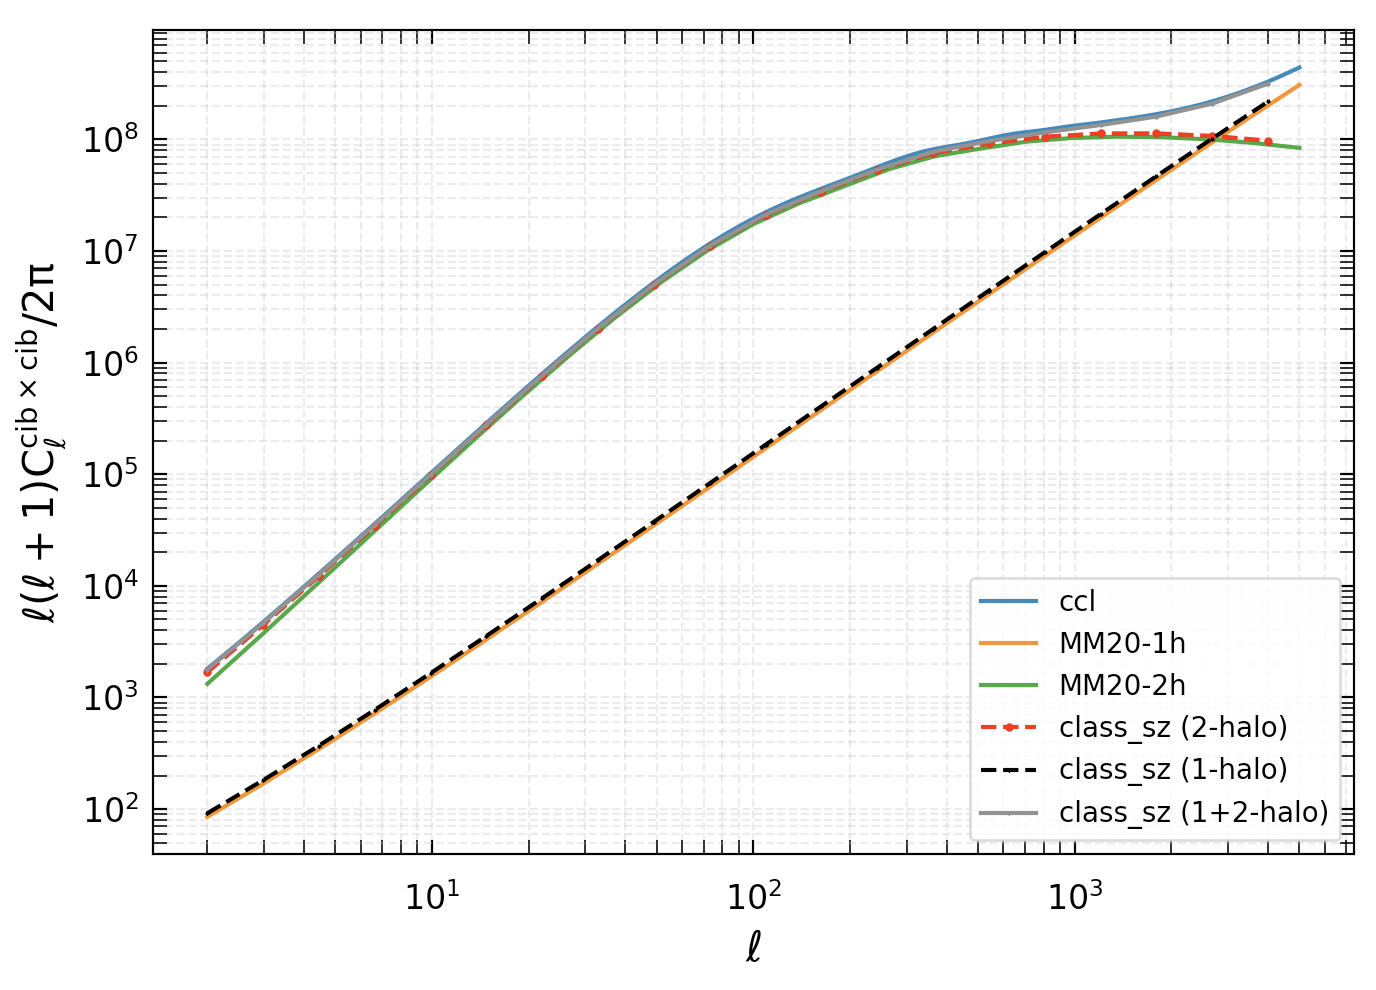